### Import necessary libraries

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

2. DATA EXPLORATION (KHÁM PHÁ DỮ LIỆU - ĐAN XEN TIỀN XỬ LÝ DỮ LIỆU)

Get data in file "inf.csv" and save it into dataframe df_info

In [60]:
df_info = pd.read_csv('inf.csv')
df_info.head()

,Id,Title,Price,Square,District,City,Date
0,2127880,"Phòng nội thất cao cấp ưu tiên nữ, gần vòng xo...",2.9 Triệu/tháng,22m²,Tân Phú,Hồ Chí Minh,\r\n08/12/2022
1,2127970,Nhà Cho Thuê RỘNG RÃI - THOÁNG MÁT - AN NINH -...,3.5 Triệu/tháng,52.5m²,Quận 9,Hồ Chí Minh,\r\n08/12/2022
2,2127186,Cho thuê mặt bằng KD và phòng trọ số 36/66 Ngu...,2 Triệu/tháng,6m²,Bình Thạnh,Hồ Chí Minh,\r\n07/12/2022
3,2122158,Thuê phòng 2.5 triệu 20m2 căn bìa tầng trệt gầ...,2.5 Triệu/tháng,20m²,Quận 4,Hồ Chí Minh,\r\n29/11/2022
4,2119311,"Cho thuê phòng ĐẸP 16m2 đường Thành Thái-Q10, ...",5 Triệu/tháng,16m²,Quận 10,Hồ Chí Minh,\r\n25/11/2022


In [61]:
df_info = df_info.set_index('Id').sort_index()
df_info.head()

,Title,Price,Square,District,City,Date
Id,,,,,,
478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.5 Triệu/tháng,18m²,Quận 3,Hồ Chí Minh,\r\n20/06/2020
728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.3 Triệu/tháng,25 m²,Quận 7,Hồ Chí Minh,\r\n17/10/2018
781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3 Triệu/tháng,15m²,Quận 10,Hồ Chí Minh,\r\n05/10/2018
781448,Chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7 Triệu/tháng,27m²,Tân Bình,Hồ Chí Minh,\r\n06/10/2018
789361,"Phòng cho thuê giá rẻ, Quận Gò Vấp gần chung c...",1.7 Triệu/tháng,12m²,Gò Vấp,Hồ Chí Minh,\r\n09/10/2018


In [62]:
df_info.shape

(1185, 6)

Dataset có 1185 dòng và 6 cột

Mỗi dòng cho biết thông tin của nhà trọ hoặc phòng trọ cho thuê. Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau.

In [63]:
df_info.duplicated().sum()

0

Mỗi cột có ý nghĩa gì?
Ý nghĩa của mỗi cột là:

ID là để phân biệt phòng trọ, nhà trọ.

Title là tiêu đề của phòng trọ, nhà trọ.

Price là giá cho thuê của phòng trọ, nhà trọ theo tháng, đơn vị là VNĐ.

Square là diện tích của phòng trọ, nhà trọ, đơn vị là m2

District là địa chỉ quận của phòng trọ, nhà trọ.

City là địa chỉ thành phố của phòng trọ, nhà trọ.

Date là ngày đăng tin cho thuê của phòng trọ, nhà trọ.

In [64]:
df_info.columns

Index(['Title', 'Price', 'Square', 'District', 'City', 'Date'], dtype='object')

------------

KIỂM TRA KIỂU DỮ LIỆU

In [65]:
df_info.dtypes

Title       object
Price       object
Square      object
District    object
City        object
Date        object
dtype: object

Kết quả trên cho thấy tất cả các cột đều có kiểu dữ liệu là object. Gây khó khăn cho quá trình tính toán.

Ta thấy rằng có 3 cột có thể chuyển sang dạng khác là Price (numeric), Square (numeric) và Date (datetime). Tiến hành chuyển thôi nàoo

-----

In [66]:
df_info['Square']

Id
478324       18m²
728993      25 m²
781296       15m²
781448       27m²
789361       12m²
            ...  
2119311      16m²
2122158      20m²
2127186       6m²
2127880      22m²
2127970    52.5m²
Name: Square, Length: 1185, dtype: object

Ta thấy các dữ liệu để có m² ở sau, ta loại bỏ và chuyển nó sang dạng float.

In [67]:
df_info['Square'] = df_info['Square'].str.replace("m²","").to_list()
df_info['Square']= pd.to_numeric(df_info['Square'], errors='coerce')

In [68]:
df_info.rename(columns={'Square': 'Square(m²)'}, inplace = True)

In [69]:
df_info

,Title,Price,Square(m²),District,City,Date
Id,,,,,,
478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.5 Triệu/tháng,18.0,Quận 3,Hồ Chí Minh,\r\n20/06/2020
728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.3 Triệu/tháng,25.0,Quận 7,Hồ Chí Minh,\r\n17/10/2018
781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3 Triệu/tháng,15.0,Quận 10,Hồ Chí Minh,\r\n05/10/2018
781448,Chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7 Triệu/tháng,27.0,Tân Bình,Hồ Chí Minh,\r\n06/10/2018
789361,"Phòng cho thuê giá rẻ, Quận Gò Vấp gần chung c...",1.7 Triệu/tháng,12.0,Gò Vấp,Hồ Chí Minh,\r\n09/10/2018
...,...,...,...,...,...,...
2119311,"Cho thuê phòng ĐẸP 16m2 đường Thành Thái-Q10, ...",5 Triệu/tháng,16.0,Quận 10,Hồ Chí Minh,\r\n25/11/2022
2122158,Thuê phòng 2.5 triệu 20m2 căn bìa tầng trệt gầ...,2.5 Triệu/tháng,20.0,Quận 4,Hồ Chí Minh,\r\n29/11/2022
2127186,Cho thuê mặt bằng KD và phòng trọ số 36/66 Ngu...,2 Triệu/tháng,6.0,Bình Thạnh,Hồ Chí Minh,\r\n07/12/2022


-------

In [70]:
df_info['Price']

Id
478324     3.5 Triệu/tháng 
728993      3.3 Triệu/tháng
781296       3 Triệu/tháng 
781448       7 Triệu/tháng 
789361     1.7 Triệu/tháng 
                 ...       
2119311      5 Triệu/tháng 
2122158    2.5 Triệu/tháng 
2127186      2 Triệu/tháng 
2127880    2.9 Triệu/tháng 
2127970    3.5 Triệu/tháng 
Name: Price, Length: 1185, dtype: object

Ta thấy các dữ liệu đều có đuôi là Triệu/tháng. Còn đuôi nào nữa không nhỉ? Kiểm tra thử nhé.

In [71]:
df_info['Price'].unique()

array(['3.5 Triệu/tháng ', '3.3 Triệu/tháng', '3 Triệu/tháng ',
       '7 Triệu/tháng ', '1.7 Triệu/tháng ', '1.5 Triệu/tháng ',
       '5 Triệu/tháng', 'Thương lượng', '6 Triệu/tháng',
       '4.5 Trăm nghìn/tháng', '4 Triệu/tháng', '1.2 Triệu/tháng',
       '5.5 Triệu/tháng', '4.5 Triệu/tháng ', '2.6 Triệu/tháng ',
       '2.5 Triệu/tháng ', '3500 Triệu/tháng ', '4.7 Triệu/tháng',
       '2.3 Triệu/tháng', '1.1 Triệu/tháng', '1 Triệu/tháng',
       '3.7 Triệu/tháng', '3.5 Triệu/tháng', '2.6 Triệu/tháng',
       '7.5 Triệu/tháng', '5.8 Triệu/tháng', '3 Triệu/tháng',
       '5.9 Triệu/tháng', '2.8 Triệu/tháng', '1.3 Triệu/tháng',
       '1.8 Triệu/tháng ', '4 Triệu/tháng ', '2.1 Triệu/tháng',
       '2.5 Triệu/tháng', '1.5 Triệu/tháng', '1.9 Triệu/tháng',
       '2.2 Triệu/tháng', '3.2 Triệu/tháng', '1.25 Triệu/tháng',
       '6.8 Triệu/tháng', '2.7 Triệu/tháng ', '4.5 Triệu/tháng',
       '6.5 Triệu/tháng', '2 Triệu/tháng ', '9 Trăm nghìn/tháng',
       '2 Triệu/tháng', '2.25 Triệu/th

Các kiểu dữ liệu có đuôi là Trăm nghìn/tháng, Triệu/tháng

Và kiểu dữ liệu là Thương lượng

Ta sẽ chuyển các dữ liệu về dạng float và tiêu chuẩn là Triệu/tháng.
Thương lượng sẽ để là NaN

In [72]:
def convert_price(price):
   if 'Triệu/tháng' in price:
      price = price.replace('Triệu/tháng', '')
      return float(price)
   if 'Thương lượng' in price:
      return np.nan
   if 'Trăm nghìn/tháng' in price:
      price = price.replace('Trăm nghìn/tháng', '')
      return float(price)/10
   return np.nan

In [73]:
df_price = df_info['Price'].to_list()

In [74]:
for i in range(len(df_price)):
   df_price[i] = convert_price(df_price[i])

df_price = df_info['Price'].to_list() # convert to array

df_price = df_info['Price'].to_numpy() # convert to ndarray

In NumPy, the ndarray (n-dimensional array) is an object that stores a collection of items, which are typically numbers. By default, the ndarray is created with the "read-only" property, which means that the data stored in the array cannot be modified. 

In [75]:
print(df_price)

[3.5, 3.3, 3.0, 7.0, 1.7, 1.5, 5.0, 5.0, 5.0, nan, 6.0, 0.45, 4.0, 5.0, 1.2, 5.5, 4.5, 2.6, 4.5, 2.5, 3500.0, 0.45, 4.7, 5.5, 0.45, 0.45, 0.45, 0.45, 2.3, 5.0, 1.1, 3.3, nan, 4.0, 4.0, 2.3, 1.0, 6.0, 0.45, 3.7, 3.5, 0.45, 0.45, 2.6, 7.5, 5.8, 3.0, 0.45, 2.6, 6.0, 3.5, 5.9, 5.0, nan, 2.8, 3.5, nan, 1.3, 5.0, 1.8, 4.0, 1.7, 2.8, 2.1, 2.5, 2.3, nan, 0.45, 5.5, 2.6, 0.45, 1.5, 1.9, 2.2, 3.2, 2.5, 1.25, 6.8, 2.7, 4.5, 4.5, 6.5, 4.5, 4.5, 4.5, 2.0, 4.0, 0.9, 2.0, 3.0, 3.5, 4.0, 2.25, 3.2, 3.4, 3.4, 5.0, 3.5, 3.5, 3.7, 2.8, 3.0, 1.1, 1.6, 1.2, 1.0, 6.5, 2.8, 4.0, 2.2, 4.0, 10.0, 4.0, nan, 5.0, 1.8, 4.0, 4.0, nan, 3.5, 4.0, 5.0, 5.0, 5.0, 5.0, 2.2, 1.8, 5.0, 4.9, 7.5, 3.2, 2.0, 5.8, 3.5, 0.45, 1.7, 0.45, 0.45, 0.45, 5.3, 5.0, 5.0, 2.7, 4.0, 6.0, 3.5, 5.0, 6.2, 0.45, 5.0, 4.2, 1.5, 4.2, 4.5, 4.5, 5.0, 3.0, 6.1, 1.5, nan, 4.8, 4.5, 1.4, 4.8, 5.3, 4.8, 3.0, 4.5, 3.0, 4.5, 4.0, 2.7, 9.0, 3.5, 3.5, 3.3, 4.5, 7.0, 6.6, 4.5, 0.45, 6.5, 5.3, 4.0, 1.0, 4.0, 5.5, 6.0, 4.0, 4.5, 3.5, 8.5, 11.0, 7.0, 4.5,

Có thể thấy một số outlier ở phía trên

------

In [76]:
def convert_price(price,square):
    if 'Triệu/tháng' in price:
        price = price.replace('Triệu/tháng','')
        return float(price)
    if 'Trăm nghìn/tháng' in price:
        price = price.replace('Trăm nghìn/tháng','')
        return float(price)/10
    if 'Triệu/m2/tháng' in price:
        if pd.isna(square):
            return np.nan
        price = price.replace('Triệu/m2/tháng','')
        return float(price)*square
    if 'Trăm nghìn/m2/tháng' in price:
        if pd.isna(square):
            return np.nan
        price = price.replace('Trăm nghìn/m2/tháng','')
        price = float(price)/10
        return price*square
    if 'Nghìn/m2/tháng' in price:
        if pd.isna(square):
            return np.nan
        price = price.replace('Nghìn/m2/tháng','')
        price = float(price)/1000
        return price*square
    return np.nan


df_price_square = df_info[['Price','Square(m²)']]

In [77]:
print(df_price_square['Price'])

Id
478324     3.5 Triệu/tháng 
728993      3.3 Triệu/tháng
781296       3 Triệu/tháng 
781448       7 Triệu/tháng 
789361     1.7 Triệu/tháng 
                 ...       
2119311      5 Triệu/tháng 
2122158    2.5 Triệu/tháng 
2127186      2 Triệu/tháng 
2127880    2.9 Triệu/tháng 
2127970    3.5 Triệu/tháng 
Name: Price, Length: 1185, dtype: object


In [78]:
# for i in range(len(df_price_square)):
for i in df_price_square.index:
   df_price_square.at[i, 'Price'] = convert_price(df_price_square.loc[i]['Price'],df_price_square.loc[i]['Square(m²)'])

In [79]:
type(pd.to_numeric(df_price_square['Price']))

pandas.core.series.Series

In [80]:
df_info['Price']=df_price_square['Price'].to_list()

In [81]:
df_info.rename(columns={'Price':'Price(Triệu/tháng)'}, inplace=True)

In [82]:
df_info

,Title,Price(Triệu/tháng),Square(m²),District,City,Date
Id,,,,,,
478324,Cho thuê phòng để ở tại 108/64A1 Trần Quang Di...,3.5,18.0,Quận 3,Hồ Chí Minh,\r\n20/06/2020
728993,Phòng vừa xây xong thoáng mát gần các trường Đ...,3.3,25.0,Quận 7,Hồ Chí Minh,\r\n17/10/2018
781296,Cần share lại gấp phòng trọ mới thuê tại đường...,3.0,15.0,Quận 10,Hồ Chí Minh,\r\n05/10/2018
781448,Chính chủ cho thuê căn hộ dịch vụ gần sân bay ...,7.0,27.0,Tân Bình,Hồ Chí Minh,\r\n06/10/2018
789361,"Phòng cho thuê giá rẻ, Quận Gò Vấp gần chung c...",1.7,12.0,Gò Vấp,Hồ Chí Minh,\r\n09/10/2018
...,...,...,...,...,...,...
2119311,"Cho thuê phòng ĐẸP 16m2 đường Thành Thái-Q10, ...",5.0,16.0,Quận 10,Hồ Chí Minh,\r\n25/11/2022
2122158,Thuê phòng 2.5 triệu 20m2 căn bìa tầng trệt gầ...,2.5,20.0,Quận 4,Hồ Chí Minh,\r\n29/11/2022
2127186,Cho thuê mặt bằng KD và phòng trọ số 36/66 Ngu...,2.0,6.0,Bình Thạnh,Hồ Chí Minh,\r\n07/12/2022


df_info.rename()

----------

In [83]:
df_info['Date']

Id
478324     \r\n20/06/2020 
728993     \r\n17/10/2018 
781296     \r\n05/10/2018 
781448     \r\n06/10/2018 
789361     \r\n09/10/2018 
                ...       
2119311    \r\n25/11/2022 
2122158    \r\n29/11/2022 
2127186    \r\n07/12/2022 
2127880    \r\n08/12/2022 
2127970    \r\n08/12/2022 
Name: Date, Length: 1185, dtype: object

Ta thấy dữ liệu dư ký tự '\n' và '\r'. Xóa bỏ chúng và đưa về dạng dữ liệu datetime.

In [84]:
df_info['Date']=df_info['Date'].str.replace('\r\n','')
df_info['Date']=df_info['Date'].str.replace(' ','')
df_info['Date']=pd.to_datetime(df_info['Date'],format = "%d/%m/%Y",errors = 'raise')

In [85]:
print(df_info.loc[478324, 'Date'])

2020-06-20 00:00:00


## XỬ LÝ DỮ LIỆU NAN

In [86]:
df_info.isnull().sum()

Title                  0
Price(Triệu/tháng)     8
Square(m²)            38
District               0
City                   0
Date                   0
dtype: int64

Several ways to handle missing or nan (not a number) data:
1. Drop the rows with NaN values.
2. Replace that number with a specific value mean, median or mode...
3. Use ML model to predict the missing value.
4. Ignore it in analysis.
5. Use data imputation technique like mean imputation, median imputation, etc.
6. Use KNN to impute missing value
7. Use regression imputation

Imputation is a statistical technique for replacing missing values in a dataset with estimated values

Không thể nào biết được Price và Square của một nơi bất kỳ được (khó đoán). Vậy nên ta sẽ drop chúng

In [87]:
df_info.dropna(inplace=True)

In [88]:
df_info.isnull().sum()

Title                 0
Price(Triệu/tháng)    0
Square(m²)            0
District              0
City                  0
Date                  0
dtype: int64

## OUTLIERS

Vẽ boxplot chart để xem outlier của giá và diện tích

In [89]:
def boxplot_chart(col):
   fig = plt.figure(figsize=(6,5))
   sns.boxenplot(df_info[col])
   plt.title(f'{col} - boxplot chart')
   plt.show()

c:\Users\laito\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


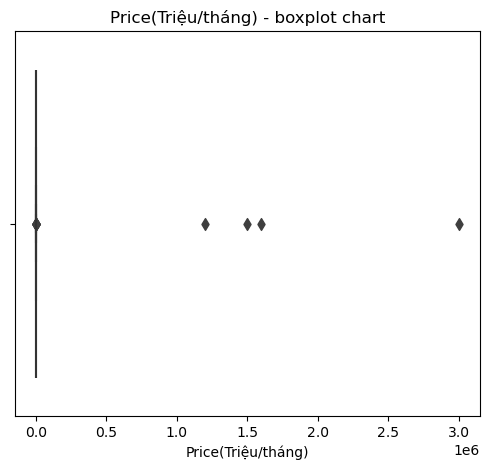

In [90]:
boxplot_chart('Price(Triệu/tháng)')


Ta thấy các ouliers đều lớn hơn hoặc bằng 500 triệu. Thử in chúng ra nhó

In [91]:
outliers_price = df_info[df_info['Price(Triệu/tháng)'] > 500]
outliers_price

,Title,Price(Triệu/tháng),Square(m²),District,City,Date
Id,,,,,,
841207,Cho thuê phòng quận 4 đường vân đồn giáp quận ...,3500.0,45.0,Quận 4,Hồ Chí Minh,2018-10-15
1441460,"Phòng quận 5 cho thuê, giờ tự do, được nấu ăn ...",1200000.0,22.0,Quận 5,Hồ Chí Minh,2019-03-10
1450703,"Cho thuê phòng trọ 27m2 đường Nguyễn Khoái, Ph...",3000000.0,27.0,Quận 4,Hồ Chí Minh,2019-05-09
1478477,"Phòng trọ cho thuê,giá 1tr6/tháng.phòng riêng,...",1600000.0,16.0,Gò Vấp,Hồ Chí Minh,2019-09-06
1479914,Phòng trọ cho thuê đường nguyễn ảnh thủ quận 1...,1500000.0,18.0,Quận 12,Hồ Chí Minh,2019-09-11


Nguyên nhân có outliers này là do chủ nhà nhập nhầm giá tiền, cùng chỉnh sửa lại nhé với giá trị đúng của nó là một số nhỏ hơn 10.

In [92]:
for i in outliers_price.index:
   while outliers_price.loc[i, 'Price(Triệu/tháng)'] > 10:
      outliers_price.loc[i, 'Price(Triệu/tháng)'] /= 10
   

In [93]:
outliers_price

,Title,Price(Triệu/tháng),Square(m²),District,City,Date
Id,,,,,,
841207,Cho thuê phòng quận 4 đường vân đồn giáp quận ...,3.5,45.0,Quận 4,Hồ Chí Minh,2018-10-15
1441460,"Phòng quận 5 cho thuê, giờ tự do, được nấu ăn ...",1.2,22.0,Quận 5,Hồ Chí Minh,2019-03-10
1450703,"Cho thuê phòng trọ 27m2 đường Nguyễn Khoái, Ph...",3.0,27.0,Quận 4,Hồ Chí Minh,2019-05-09
1478477,"Phòng trọ cho thuê,giá 1tr6/tháng.phòng riêng,...",1.6,16.0,Gò Vấp,Hồ Chí Minh,2019-09-06
1479914,Phòng trọ cho thuê đường nguyễn ảnh thủ quận 1...,1.5,18.0,Quận 12,Hồ Chí Minh,2019-09-11


Update vào df_info thui nào.

In [94]:
df_info.loc[outliers_price.index, 'Price(Triệu/tháng)'] = outliers_price.loc[outliers_price.index, 'Price(Triệu/tháng)']

In [95]:
df_info.loc[outliers_price.index, 'Price(Triệu/tháng)']
# Update successful

Id
841207     3.5
1441460    1.2
1450703    3.0
1478477    1.6
1479914    1.5
Name: Price(Triệu/tháng), dtype: float64

c:\Users\laito\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


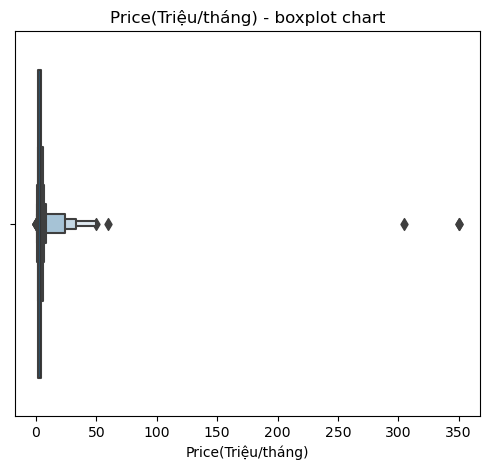

In [96]:
# Vẽ lại boxplot xem nào
boxplot_chart('Price(Triệu/tháng)')

Ta thấy còn những outlier trên 50. Xử lý tiếp nàoo

In [97]:
outliers_price = df_info[df_info['Price(Triệu/tháng)'] > 50]
outliers_price

,Title,Price(Triệu/tháng),Square(m²),District,City,Date
Id,,,,,,
1518936,Cần sang hoặc cho thuê khách sạn một trệt ba l...,350.000,120.0,Quận 1,Hồ Chí Minh,2019-12-19
1518942,Cần sang GẤP hoặc cho thuê khách sạn một trệt ...,350.000,120.0,Quận 1,Hồ Chí Minh,2019-12-19
1565755,"Q7, cầu Tân Thuận 1, Phòng full nội thất, khai...",50.005,25.0,Quận 7,Hồ Chí Minh,2020-05-20
1611533,COVID làm khủng hoảng kinh tế nên tôi cần về q...,305.000,100.0,Nhà Bè,Hồ Chí Minh,2020-08-30
1820919,"Sang Gấp Căn Nhà Trọ 11P, 1MB Giá rẻ 60 tr bao...",60.000,112.0,Tân Bình,Hồ Chí Minh,2021-08-06


Tại sao lại có những giá như này nhỉ? Đoán là giá này là giá bán chứ không phải giá thuê. Thế nên drop chúng luôn nhó.

In [99]:
df_info.drop(index = outliers_price.index, inplace = True)

c:\Users\laito\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


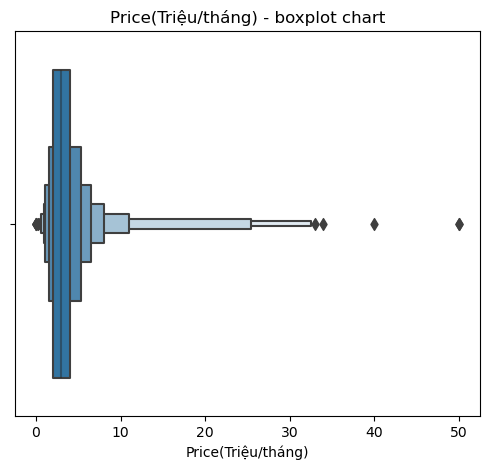

In [101]:
# Vẽ lại lần nữa nàoo
boxplot_chart('Price(Triệu/tháng)')

------

c:\Users\laito\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


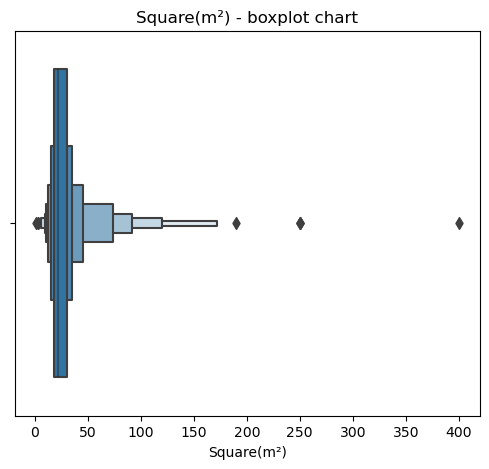

In [98]:
boxplot_chart('Square(m²)')

Ta thấy có nhiều outliers trên 175

In [106]:
outliers_square = df_info[df_info['Square(m²)'] > 175]
outliers_square

,Title,Price(Triệu/tháng),Square(m²),District,City,Date
Id,,,,,,
1491943,Ký túc xá máy lạnh giá chỉ 450k/tháng đủ nội t...,0.45,190.0,Quận 8,Hồ Chí Minh,2020-06-07
1589500,Cho thuê KTX Homestay cao cấp quận Thủ Đức,1.60,250.0,Thủ Đức,Hồ Chí Minh,2021-01-13
1722247,Cho thuê KTX Homestay Q.Thủ Đức giá rẻ 1 triệu...,1.00,250.0,Thủ Đức,Hồ Chí Minh,2021-01-13
1775448,Cho thuê giường KTX trung tâm Phú Nhuận Gía 1.6tr,1.60,400.0,Phú Nhuận,Hồ Chí Minh,2021-05-19


Có 4/5 thông tin trên là liên quan đến kí túc xá. 1 cái là cho thuê phòng riêng ở gần Gigamall, nhưng với diện tích là 400m2 - ngang với một căn nhà rồi còn gì nữa:v. Thế nên ta sẽ drop dữ liệu căn nhà riêng đấy vì diện tích rất vô lý.

In [105]:
df_info.drop(index=1722246, inplace=True)

-----

## REVIEW DATA

In [108]:
df_info.shape

(1134, 6)

In [109]:
df_info.dtypes

Title                         object
Price(Triệu/tháng)           float64
Square(m²)                   float64
District                      object
City                          object
Date                  datetime64[ns]
dtype: object